In [1]:
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
import cufflinks as cf

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.style.use('ggplot')

In [2]:
fac = pd.read_csv(r'C:\Users\David\Python\scrapy\facup\00_fa_cup\facup_v3.csv')

Dropping years we will not use in merge, 1952 onwards has a consistent number of matches in each round and has some post-WW2 recovery time for teams/league to settle

In [3]:
fac = fac[fac.year > 1951]

Creating new dataframe concatenating all teams into a single column

In [4]:
home = fac[['home_team','round','year','stage']].rename(columns={'home_team':'team'})
away = fac[['away_team','round','year','stage']].rename(columns={'away_team':'team'})

teams = pd.concat([home,away], ignore_index = True)

Reducing dataframe so we keep only one row per year/team combination from the first stage that team appears in that particular year e.g. 

ARSENAL THIRD ROUND PROPER 1952 6 

(6 is the first stage arsenal appeared in 1952, third round proper)

In [5]:
first = teams.loc[teams.groupby(['year','team'])['stage'].idxmax()]

first.head()

,team,round,year,stage
19,ACCRINGTON STANLEY,FIRST ROUND PROPER,1952,8
10242,AFC BOURNEMOUTH,FIRST ROUND PROPER,1952,8
13,ALDERSHOT,FIRST ROUND PROPER,1952,8
10311,ARSENAL,THIRD ROUND PROPER,1952,6
10310,ASTON VILLA,THIRD ROUND PROPER,1952,6


In [6]:
first_count = first.groupby(['year','stage']).size().unstack()  #counting the number of teams entering each stage in each year 

first_count.head()

stage,6.0,8.0
year,,
1952,44,80
1953,44,80
1954,44,80
1955,44,80
1956,44,80


In [7]:
first_count.iplot(kind = 'line', dimensions = (900,500))

Since 1952 there are consistently 80 teams entering in 1st round (stage 8) and 44 entering in 3rd round (stage 6).

In 2000 there were only 43 'new' teams entering 3rd as Manchester United elected to play in the Club World Cup instead [link](https://en.wikipedia.org/wiki/1999%E2%80%932000_FA_Cup), however this space was filled by 'Darlington' despite losing their 2nd round fixture.

Now checking for consistency in number of teams in top 4 divisions between 1952-2015.

In [8]:
tab = pd.read_csv(r'C:\Users\David\Python\scrapy\facup\01_league_tables\fl_pl_join_v1.csv')

tab = tab[tab.year > 1951]

tab.head()

,pos,team,w,d,l,f,a,pts,pld,year,tier
444,1,MANCHESTER UNITED,23,11,8,95,52,57,42,1952,11
445,2,TOTTENHAM HOTSPUR,22,9,11,76,51,53,42,1952,11
446,3,ARSENAL,21,11,10,80,61,53,42,1952,11
447,4,PORTSMOUTH,20,8,14,68,58,48,42,1952,11
448,5,BOLTON WANDERERS,19,10,13,65,61,48,42,1952,11


In [9]:
league_count = tab.groupby(['year','tier']).size().unstack()

league_count.head()

tier,11,21,31,32,41
year,,,,,
1952,22,22,24,24,NaN
1953,22,22,24,24,NaN
1954,22,22,24,24,NaN
1955,22,22,24,24,NaN
1956,22,22,24,24,NaN


In [10]:
league_count.iplot(kind = 'bar', barmode = 'stack', bargap = 0.4,  dimensions = (900,500))

1962 has ACCRINGTON STANLEY missing from tier 41 as they resigned, however this also happened to ALDERSHOT in 1992 and we have the data for them so creating a row for ACCRINGTON STANLEY to say they finished 24th that year

In [11]:
acc_stan = pd.DataFrame({'pos':[24], 
                         'team':['ACCRINGTON STANLEY'], 
                         'w':[np.nan], 
                         'd':[np.nan],
                         'l':[np.nan],
                         'f':[np.nan],
                         'a':[np.nan],
                         'pts':[np.nan],
                         'pld':[np.nan],
                         'year':[1962],
                         'tier':[41]})

acc_stan

,a,d,f,l,pld,pos,pts,team,tier,w,year
0,NaN,NaN,NaN,NaN,NaN,24,NaN,ACCRINGTON STANLEY,41,NaN,1962


In [12]:
tab = pd.concat([tab, acc_stan], ignore_index = True)

Investigating years in which there are more than 44 teams in the top two tiers as we know that there are only 44 teams entering in at stage 6

In [13]:
fac_1992 = first[(first.year == 1992) & (first.stage == 6)]
tab_1992 = tab[(tab.year == 1992) & (tab.tier < 30)].sort_values('team')

In [14]:
merge_1992 = pd.merge(fac_1992, tab_1992, how='outer')
merge_1992

,team,round,year,stage,a,d,f,l,pld,pos,pts,tier,w
0,ARSENAL,THIRD ROUND PROPER,1992,6,46,15,81,8,42,4,72,11,19
1,ASTON VILLA,THIRD ROUND PROPER,1992,6,44,9,48,16,42,7,60,11,17
2,BARNSLEY,THIRD ROUND PROPER,1992,6,57,11,45,19,46,16,59,21,16
3,BLACKBURN ROVERS,THIRD ROUND PROPER,1992,6,53,11,70,14,46,6,74,21,21
4,BRIGHTON & HOVE ALBION,THIRD ROUND PROPER,1992,6,77,11,56,23,46,23,47,21,12
5,BRISTOL CITY,THIRD ROUND PROPER,1992,6,71,15,55,18,46,17,54,21,13
6,BRISTOL ROVERS,THIRD ROUND PROPER,1992,6,63,14,60,16,46,13,62,21,16
7,CAMBRIDGE UNITED,THIRD ROUND PROPER,1992,6,47,17,65,10,46,5,74,21,19
8,CHARLTON ATHLETIC,THIRD ROUND PROPER,1992,6,48,11,54,15,46,7,71,21,20
9,CHELSEA,THIRD ROUND PROPER,1992,6,60,14,50,15,42,14,53,11,13


Between 1992-1995 there is some inconsistency in which stage of the FA Cup teams from each tier enter.

It is likely that as the leagues were restructured some teams were enterered into stages earlier than the rest of the teams in their tier.

## Starting FA cup / league tables merge!

In [15]:
fac_teams = first # renaming dataframe

fac_teams.head()

,team,round,year,stage
19,ACCRINGTON STANLEY,FIRST ROUND PROPER,1952,8
10242,AFC BOURNEMOUTH,FIRST ROUND PROPER,1952,8
13,ALDERSHOT,FIRST ROUND PROPER,1952,8
10311,ARSENAL,THIRD ROUND PROPER,1952,6
10310,ASTON VILLA,THIRD ROUND PROPER,1952,6


In [16]:
league_teams = tab[['team','pos','year','tier']].copy()

league_teams.head()

,team,pos,year,tier
0,MANCHESTER UNITED,1,1952,11
1,TOTTENHAM HOTSPUR,2,1952,11
2,ARSENAL,3,1952,11
3,PORTSMOUTH,4,1952,11
4,BOLTON WANDERERS,5,1952,11


In [17]:
merged = pd.merge(fac_teams, league_teams, how = 'outer', on = ['team', 'year']).reset_index(drop=True)
merged.head()

,team,round,year,stage,pos,tier
0,ACCRINGTON STANLEY,FIRST ROUND PROPER,1952,8,22,31
1,AFC BOURNEMOUTH,FIRST ROUND PROPER,1952,8,NaN,NaN
2,ALDERSHOT,FIRST ROUND PROPER,1952,8,12,32
3,ARSENAL,THIRD ROUND PROPER,1952,6,3,11
4,ASTON VILLA,THIRD ROUND PROPER,1952,6,6,11


Checking league teams that don't have an FA cup team match

In [18]:
merged[merged['round'].isnull()].sort_values('team').team.unique()

array(['BOURNEMOUTH', 'BOURNEMOUTH & BOSCOMBE ATHLETIC', 'BRIGHTON & HA',
       'CAMBRIDGEUNITED', 'CHESTER CITY', 'HALIFAX TOWN', 'HARTLEPOOL',
       'HARTLEPOOL UNITED', 'HARTLEPOOLS UNITED', 'MANCHESTER UNITED',
       'NORTHAMPTON', 'SCUNTHORPE & LINDSEY UNITED', 'SHREWSBURY',
       'SWANSEA CITY'], dtype=object)

Checking FA cup teams that don't have an league cup team match

In [19]:
league_teams[league_teams['team'].isin(['BOURNEMOUTH','BOURNEMOUTH & BOSCOMBE ATHLETIC','AFC BOURNEMOUTH'])].team.value_counts()

BOURNEMOUTH                        37
BOURNEMOUTH & BOSCOMBE ATHLETIC    20
AFC BOURNEMOUTH                     7
Name: team, dtype: int64

In [20]:
37 + 20 + 7   # checking there are 64 entries (1952-2015)

64

In [21]:
league_teams[league_teams['team'].isin(['CAMBRIDGEUNITED','CAMBRIDGE UNITED'])].team.value_counts()

CAMBRIDGE UNITED    35
CAMBRIDGEUNITED      1
Name: team, dtype: int64

In [22]:
league_teams[league_teams['team'].isin(['CAMBRIDGEUNITED','CAMBRIDGE UNITED'])]

,team,pos,year,tier
1834,CAMBRIDGE UNITED,20,1971,41
1916,CAMBRIDGE UNITED,10,1972,41
2001,CAMBRIDGE UNITED,3,1973,41
2087,CAMBRIDGE UNITED,21,1974,31
2188,CAMBRIDGE UNITED,6,1975,41
2287,CAMBRIDGE UNITED,13,1976,41
2367,CAMBRIDGE UNITED,1,1977,41
2436,CAMBRIDGE UNITED,2,1978,31
2516,CAMBRIDGE UNITED,12,1979,21
2604,CAMBRIDGE UNITED,8,1980,21


Looks like a typo

In [23]:
league_teams[league_teams['team'].isin(['BRIGHTON & HA','BRIGHTON & HOVE ALBION'])].team.value_counts()

BRIGHTON & HOVE ALBION    63
BRIGHTON & HA              1
Name: team, dtype: int64

In [24]:
league_teams[league_teams['team'].isin(['CHESTER','CHESTER CITY'])]

,team,pos,year,tier
62,CHESTER,19,1952,31
155,CHESTER,20,1953,31
251,CHESTER,24,1954,31
343,CHESTER,24,1955,31
428,CHESTER,17,1956,31
524,CHESTER,21,1957,31
616,CHESTER,21,1958,31
724,CHESTER,13,1959,41
823,CHESTER,20,1960,41
919,CHESTER,24,1961,41


In [25]:
merged[merged['team'].isin(['HARTLEPOOL','HARTLEPOOL UNITED','HARTLEPOOLS UNITED'])].sort_values('year')

,team,round,year,stage,pos,tier
57,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1952,8,9,31
175,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1953,8,17,31
297,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1954,8,18,31
424,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1955,8,5,31
546,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1956,8,4,31
673,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1957,8,2,31
795,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1958,8,17,31
918,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1959,8,19,41
1044,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1960,8,24,41
1166,HARTLEPOOLS UNITED,FIRST ROUND PROPER,1961,8,23,41


In [26]:
league_teams[league_teams['team'].isin(['NORTHAMPTON','NORTHAMPTON TOWN'])].team.value_counts()

NORTHAMPTON TOWN    57
NORTHAMPTON          7
Name: team, dtype: int64

In [27]:
league_teams[league_teams['team'].isin(['SCUNTHORPE UNITED','SCUNTHORPE & LINDSEY UNITED'])].team.value_counts()

SCUNTHORPE UNITED              57
SCUNTHORPE & LINDSEY UNITED     7
Name: team, dtype: int64

In [28]:
league_teams[league_teams['team'].isin(['SHREWSBURY TOWN','SHREWSBURY'])]

,team,pos,year,tier
87,SHREWSBURY TOWN,20,1952,32
182,SHREWSBURY TOWN,23,1953,32
272,SHREWSBURY TOWN,21,1954,32
359,SHREWSBURY TOWN,16,1955,32
448,SHREWSBURY TOWN,13,1956,32
536,SHREWSBURY TOWN,9,1957,32
636,SHREWSBURY TOWN,17,1958,32
715,SHREWSBURY TOWN,4,1959,41
782,SHREWSBURY TOWN,3,1960,31
881,SHREWSBURY TOWN,10,1961,31


In [29]:
merged[merged['team'].isin(['SWANSEA','SWANSEA CITY', 'SWANSEA TOWN'])]

,team,round,year,stage,pos,tier
108,SWANSEA TOWN,THIRD ROUND PROPER,1952,6,19,21
229,SWANSEA TOWN,THIRD ROUND PROPER,1953,6,11,21
353,SWANSEA TOWN,THIRD ROUND PROPER,1954,6,20,21
479,SWANSEA TOWN,THIRD ROUND PROPER,1955,6,10,21
603,SWANSEA TOWN,THIRD ROUND PROPER,1956,6,10,21
725,SWANSEA TOWN,THIRD ROUND PROPER,1957,6,10,21
846,SWANSEA TOWN,THIRD ROUND PROPER,1958,6,19,21
972,SWANSEA TOWN,THIRD ROUND PROPER,1959,6,11,21
1099,SWANSEA TOWN,THIRD ROUND PROPER,1960,6,12,21
1222,SWANSEA TOWN,THIRD ROUND PROPER,1961,6,7,21


In [30]:
name_reg = {'BOURNEMOUTH':'AFC BOURNEMOUTH',
           'BOURNEMOUTH & BOSCOMBE ATHLETIC':'AFC BOURNEMOUTH',
           'BRIGHTON & HA':'BRIGHTON & HOVE ALBION',
           'CAMBRIDGEUNITED':'CAMBRIDGE UNITED',
           'CHESTER CITY':'CHESTER',
           'NORTHAMPTON':'NORTHAMPTON TOWN',
            'SCUNTHORPE & LINDSEY UNITED':'SCUNTHORPE UNITED',
            'SHREWSBURY':'SHREWSBURY TOWN',
            'HALIFAX TOWN':'FC HALIFAX TOWN'
           }

In [31]:
name_reg.keys()

['BOURNEMOUTH & BOSCOMBE ATHLETIC',
 'NORTHAMPTON',
 'HALIFAX TOWN',
 'SHREWSBURY',
 'BRIGHTON & HA',
 'SCUNTHORPE & LINDSEY UNITED',
 'CHESTER CITY',
 'CAMBRIDGEUNITED',
 'BOURNEMOUTH']

#### Updating team names in league_teams and re-merging

In [32]:
def rename(team):
    if team in (name_reg.keys()):
        return name_reg[team]
    else:
        return team

league_teams.ix[:,'team'] = league_teams.team.map(rename)

In [33]:
#hartlepool and swansea are slightly more complicated due to name change

hart_pre = ((league_teams.team.isin(['HARTLEPOOL','HARTLEPOOL UNITED','HARTLEPOOLS UNITED'])) & (league_teams.year < 1969))
hart_post = ((league_teams.team.isin(['HARTLEPOOL','HARTLEPOOL UNITED','HARTLEPOOLS UNITED'])) & (league_teams.year > 1968))

league_teams.ix[hart_pre ,'team'] = 'HARTLEPOOLS UNITED'
league_teams.ix[hart_post ,'team'] = 'HARTLEPOOL UNITED'

In [34]:
swan_pre = ((league_teams.team.isin(['SWANSEA CITY','SWANSEA TOWN'])) & (league_teams.year < 1971))
swan_post = ((league_teams.team.isin(['SWANSEA CITY','SWANSEA TOWN'])) & (league_teams.year > 1970))

league_teams.ix[swan_pre ,'team'] = 'SWANSEA TOWN'
league_teams.ix[swan_post ,'team'] = 'SWANSEA CITY'

In [35]:
merged2 = pd.merge(fac_teams, league_teams, how = 'outer', on = ['team', 'year']).reset_index(drop=True)

merged2[merged2['round'].isnull()].sort_values('team').team.unique()

array(['MANCHESTER UNITED'], dtype=object)

Team names that required name update are now fixed, only MANCHESTER UNITED remaind in 2000 due to not participating, will now merge on fac_teams keys only so we drop MANCHESTER UNITED

In [36]:
merged3 = pd.merge(fac_teams, league_teams, how = 'left', on = ['team', 'year']).reset_index(drop=True)

merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7935 entries, 0 to 7934
Data columns (total 6 columns):
team     7935 non-null object
round    7935 non-null object
year     7935 non-null int64
stage    7935 non-null float64
pos      5888 non-null float64
tier     5888 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 433.9+ KB


Checking how many teams in each year do not have a match yet (non league teams).

32 is the standard with 80 teams entering stage 8 and 48 teams coming from the football league.

In [37]:
merged3[merged3.tier.isnull()].year.value_counts().sort

<bound method Series.sort of 2015    32
2014    32
1981    32
1980    32
1979    32
1978    32
1977    32
1976    32
1975    32
1974    32
1973    32
1972    32
1971    32
1970    32
1969    32
1968    32
1967    32
1966    32
1965    32
1964    32
1963    32
1962    32
1961    32
1960    32
1959    32
1958    32
1957    32
1956    32
1955    32
1954    32
        ..
2000    32
2013    32
2012    32
2011    32
2010    32
2009    32
2008    32
2007    32
2006    32
2005    32
2004    32
2003    32
2002    32
2001    32
1999    32
1985    32
1998    32
1997    32
1996    32
1995    32
1994    32
1993    32
1991    32
1990    32
1989    32
1988    32
1987    32
1986    32
1952    32
1992    31
Name: year, dtype: int64>

1962 has 33 teams missing due to Accrington Stanley retiring midway through the season and not have a recorded final league position.

1992 has only 31 missing teams due to reshaping of football league due to inception of premier league and therefore there were only 31 non-league teams in the fa cup stage 8 that year.

#### Creating rank column in league_teams which is absolute rank across all divisions

In [38]:
def reg_tier(ser):
    return ser.floordiv(10).rank(method = 'min')

league_teams['rank'] = league_teams.groupby('year')['tier'].transform(reg_tier) + league_teams['pos'] - 1

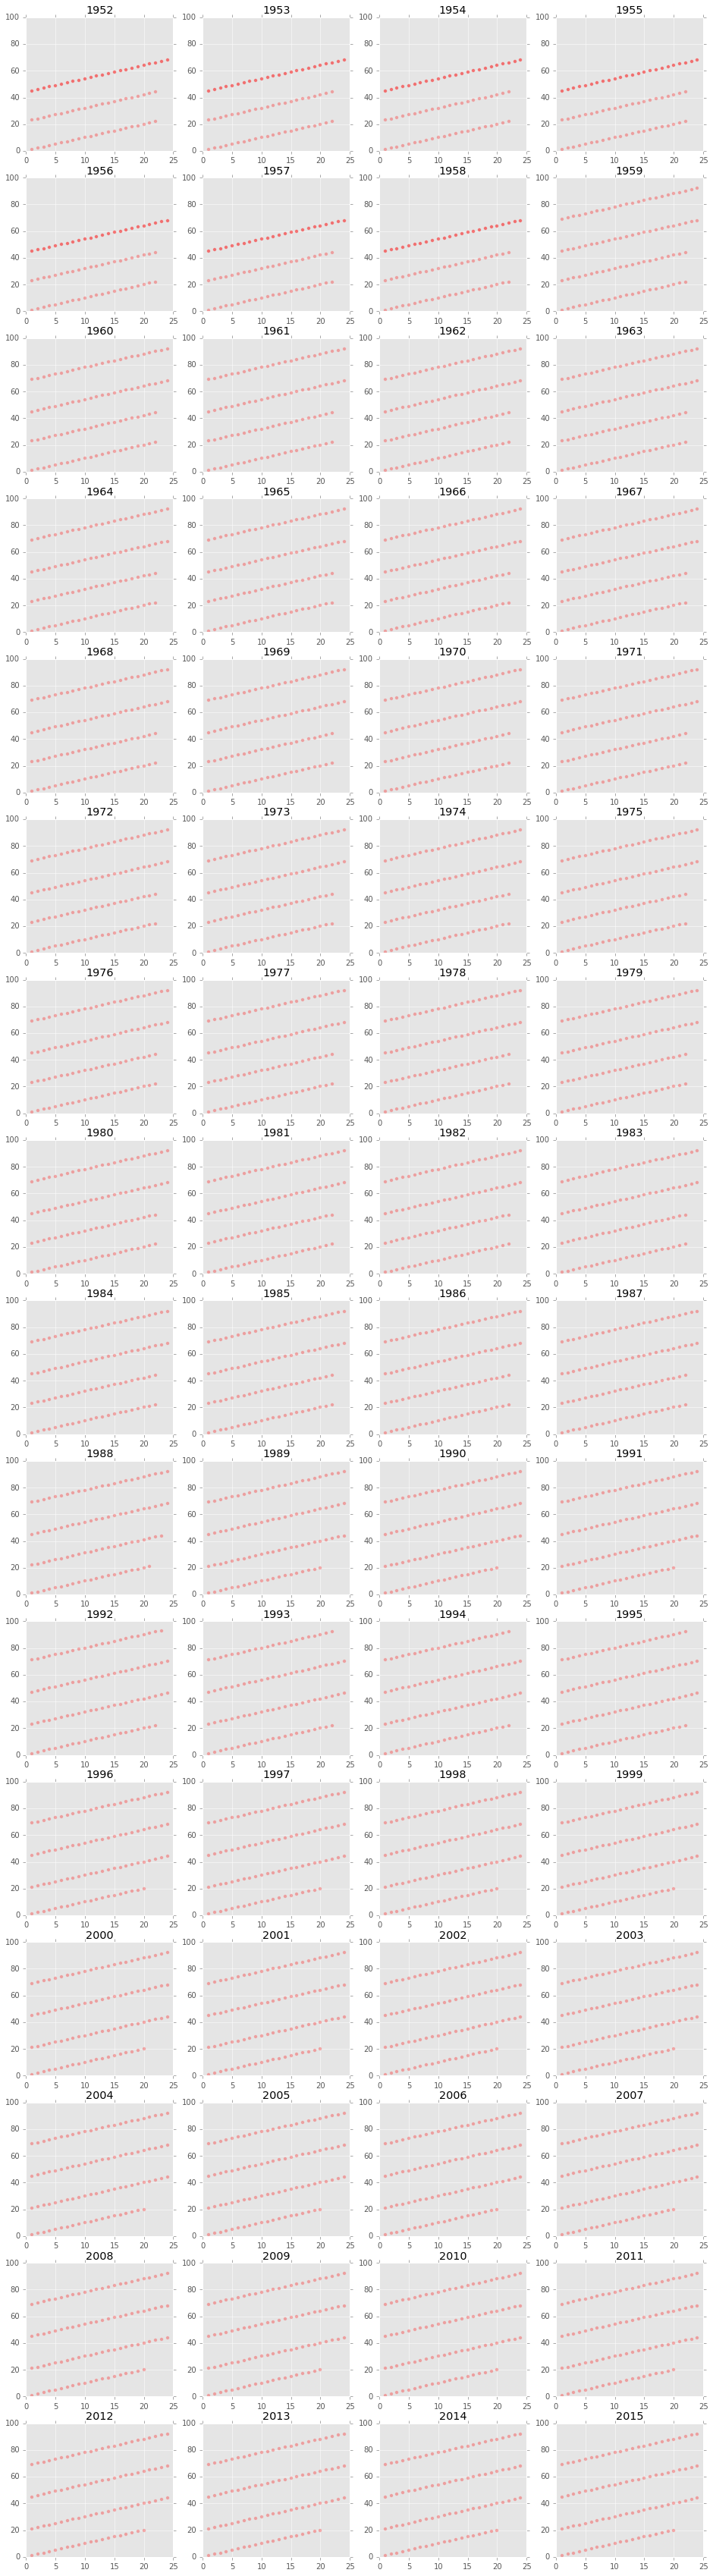

In [39]:
year_grp = league_teams.groupby('year')

fig, axs = plt.subplots(figsize=(16, 60), nrows=16, ncols=4)

subplots = zip(year_grp.groups.keys(), axs.flatten()) # list of tuple (year, AxesSubplot object)

for i, (year, ax) in enumerate(subplots):
    get_year = year_grp.get_group(year)
    ax.scatter(get_year['pos'], get_year['rank'], s=20, c='red' , alpha=0.3)  # create plot in each axes
    ax.set_title(year)
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 100)    

plt.show()

## Final FA Cup and Premier/Football League merge!

In [40]:
fac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10193 entries, 6351 to 16605
Data columns (total 14 columns):
match_id      10193 non-null int64
home_team     10193 non-null object
away_team     10193 non-null object
home_score    10187 non-null float64
away_score    10187 non-null float64
round         10193 non-null object
year          10193 non-null int64
date          10193 non-null object
replay        10193 non-null bool
qualifier     10193 non-null bool
stage         10193 non-null float64
winner        7878 non-null object
left          10193 non-null object
right         10193 non-null object
dtypes: bool(2), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [41]:
league_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5889 entries, 0 to 5888
Data columns (total 5 columns):
team    5889 non-null object
pos     5889 non-null int64
year    5889 non-null int64
tier    5889 non-null int64
rank    5889 non-null int64
dtypes: int64(4), object(1)
memory usage: 276.0+ KB


In [42]:
# merge home teams position and tier
flplmerge = pd.merge(fac, league_teams, how = 'left', left_on = ['home_team', 'year'], right_on = ['team', 'year'])

# merge away teams position and tier
flplmerge = flplmerge = pd.merge(flplmerge, league_teams, how = 'left', left_on = ['away_team', 'year'], right_on = ['team', 'year'])

flplmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10193 entries, 0 to 10192
Data columns (total 22 columns):
match_id      10193 non-null int64
home_team     10193 non-null object
away_team     10193 non-null object
home_score    10187 non-null float64
away_score    10187 non-null float64
round         10193 non-null object
year          10193 non-null int64
date          10193 non-null object
replay        10193 non-null bool
qualifier     10193 non-null bool
stage         10193 non-null float64
winner        7878 non-null object
left          10193 non-null object
right         10193 non-null object
team_x        8373 non-null object
pos_x         8373 non-null float64
tier_x        8373 non-null float64
rank_x        8373 non-null float64
team_y        8242 non-null object
pos_y         8242 non-null float64
tier_y        8242 non-null float64
rank_y        8242 non-null float64
dtypes: bool(2), float64(9), int64(2), object(9)
memory usage: 1.7+ MB


In [43]:
flplmerge.head()

,match_id,home_team,away_team,home_score,away_score,round,year,date,replay,qualifier,...,left,right,team_x,pos_x,tier_x,rank_x,team_y,pos_y,tier_y,rank_y
0,43590,BLACKBURN ROVERS,BURNLEY,3,1,SIXTH ROUND PROPER,1952,08.03.52,False,False,...,BURNLEY,BLACKBURN ROVERS,BLACKBURN ROVERS,14,21,36,BURNLEY,14,11,14
1,43591,LUTON TOWN,ARSENAL,2,3,SIXTH ROUND PROPER,1952,08.03.52,False,False,...,LUTON TOWN,ARSENAL,LUTON TOWN,8,21,30,ARSENAL,3,11,3
2,43592,PORTSMOUTH,NEWCASTLE UNITED,2,4,SIXTH ROUND PROPER,1952,08.03.52,False,False,...,PORTSMOUTH,NEWCASTLE UNITED,PORTSMOUTH,4,11,4,NEWCASTLE UNITED,8,11,8
3,43593,SHEFFIELD UNITED,CHELSEA,0,1,SIXTH ROUND PROPER,1952,08.03.52,False,False,...,SHEFFIELD UNITED,CHELSEA,SHEFFIELD UNITED,11,21,33,CHELSEA,19,11,19
4,43596,ARSENAL,CHELSEA,3,0,SEMI-FINAL,1952,07.04.52,True,False,...,CHELSEA,ARSENAL,ARSENAL,3,11,3,CHELSEA,19,11,19


In [44]:
flplmerge.rename(columns =  {'rank_x':'home_rank', 'tier_x':'home_tier','rank_y':'away_rank', 'tier_y':'away_tier'}, inplace = True)

In [45]:
flplmerge = flplmerge[['match_id', 'home_team','away_team','winner','year','round','stage','replay','home_tier','away_tier','home_rank','away_rank']]

In [46]:
flplmerge.head()

,match_id,home_team,away_team,winner,year,round,stage,replay,home_tier,away_tier,home_rank,away_rank
0,43590,BLACKBURN ROVERS,BURNLEY,BLACKBURN ROVERS,1952,SIXTH ROUND PROPER,3,False,21,11,36,14
1,43591,LUTON TOWN,ARSENAL,ARSENAL,1952,SIXTH ROUND PROPER,3,False,21,11,30,3
2,43592,PORTSMOUTH,NEWCASTLE UNITED,NEWCASTLE UNITED,1952,SIXTH ROUND PROPER,3,False,11,11,4,8
3,43593,SHEFFIELD UNITED,CHELSEA,CHELSEA,1952,SIXTH ROUND PROPER,3,False,21,11,33,19
4,43596,ARSENAL,CHELSEA,ARSENAL,1952,SEMI-FINAL,2,True,11,11,3,19


In [50]:
flplmerge.to_csv('fa_flpl_merge_v1.csv', index = False) # fa cup / football league / premier league merge

In [48]:
nleague_teams = merged3[merged3.tier.isnull()][['team','year','round','stage']]
nleague_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 5 to 7931
Data columns (total 4 columns):
team     2047 non-null object
year     2047 non-null int64
round    2047 non-null object
stage    2047 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 80.0+ KB
